In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 43.2MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.5MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [11]:
#generators :  divide data into batches.
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# Normalize

def process(image,label):

  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [19]:
#creating cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 107ms/step - loss: 1.0905 - accuracy: 0.5986 - val_loss: 0.6159 - val_accuracy: 0.6502
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5677 - accuracy: 0.7077 - val_loss: 0.5174 - val_accuracy: 0.7506
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4861 - accuracy: 0.7659 - val_loss: 0.5649 - val_accuracy: 0.7484
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4148 - accuracy: 0.8116 - val_loss: 0.4590 - val_accuracy: 0.7820
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3365 - accuracy: 0.8507 - val_loss: 0.4948 - val_accuracy: 0.7958
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2629 - accuracy: 0.8868 - val_loss: 0.7134 - val_accuracy: 0.7620
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1884 - accuracy: 0.9236 - val_loss: 0.6250 - val_ac

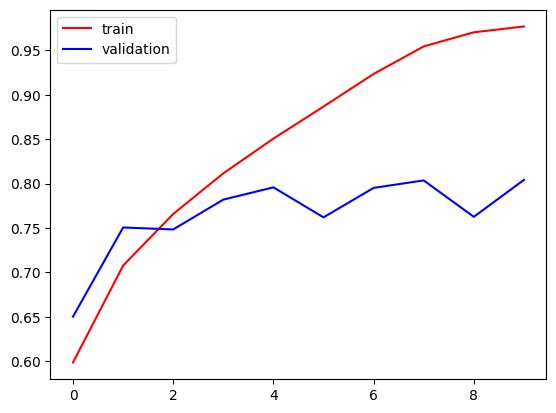

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# reducing overfitting
# add more data
# Data Augmentation
# L1/L2 Regulerization
# Dropout
# Batch Norm
#Reduce Complexity